In [1]:
# Import libraries
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt
import scipy

In [26]:
single_slit = np.append(np.append(np.zeros(100), np.array([1, 1, 1, 1, 1, 1, 1])), np.zeros(100))
index = np.arange(len(single_slit)) - np.mean(np.arange(len(single_slit)))

In [36]:
single_slit_transformed = fft.fftshift(fft.fft(single_slit))
r = np.real(single_slit_transformed * np.conjugate(single_slit_transformed))

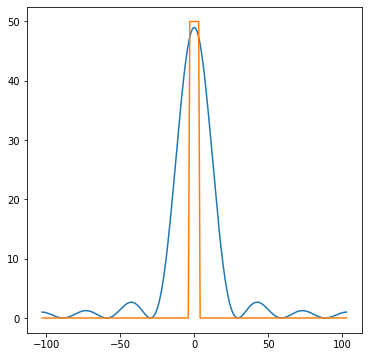

In [40]:
fig = plt.figure()
fig.set_size_inches(6, 6)
ax = fig.add_subplot(111)

ax.plot(index, r)
ax.plot(index, single_slit * 50)
plt.show()

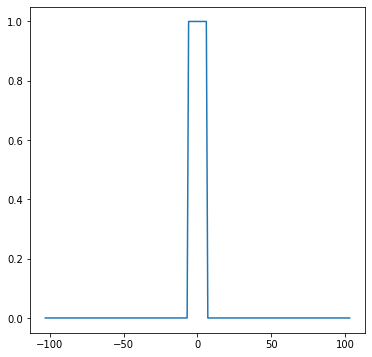

In [51]:
inv = fft.fftshift(fft.ifft(r))
inv = np.absolute(inv)
inv = inv / np.sqrt(np.sum(inv))
inv[inv > 0.1] = 1

fig = plt.figure()
fig.set_size_inches(6, 6)
ax = fig.add_subplot(111)

ax.plot(index, inv)
plt.show()

fig = plt.figure()
fig.set_size_inches(8, 8)
ax = fig.add_subplot(111)

r = np.zeros((1000, 1000))

r[497, 500] = 1
r[498, 500] = 1
r[499, 500] = 1
r[500, 500] = 1
r[501, 500] = 1
r[502, 500] = 1
r[503, 500] = 1

r[498, 499] = 1
r[499, 499] = 1
r[500, 499] = 1
r[501, 499] = 1
r[502, 499] = 1

r[498, 501] = 1
r[499, 501] = 1
r[500, 501] = 1
r[501, 501] = 1
r[502, 501] = 1

r[499, 498] = 1
r[500, 498] = 1
r[501, 498] = 1

r[499, 502] = 1
r[500, 502] = 1
r[501, 502] = 1

r[500, 497] = 1

r[500, 503] = 1

#ax.set_xlim(495, 505)
#ax.set_ylim(495, 505)

ax.imshow(r, cmap="gray")
plt.show()

circular_output = fft.fft2(1 - r)
circular_intensity = np.absolute(circular_output)
circular_intensity = circular_intensity / np.sqrt(np.sum(circular_intensity ** 2))
circular_intensity

NameError: name 'circular_intensity' is not defined

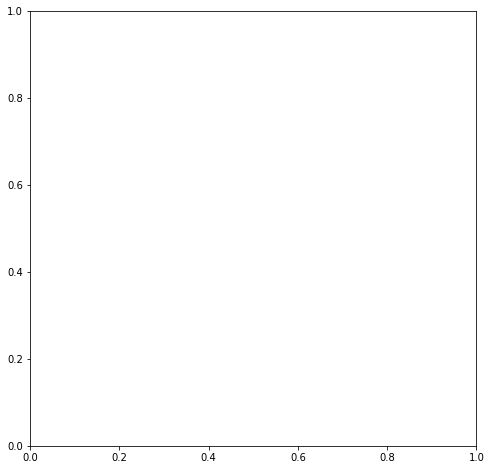

In [5]:
fig = plt.figure()
fig.set_size_inches(8, 8)
ax = fig.add_subplot(111)

#ax.set_xlim(350, 650)
#ax.set_ylim(350, 650)

#cos_intensity = np.cos(circular_intensity)
ax.imshow(circular_intensity, cmap="gray", interpolation="bilinear", aspect ='auto')
plt.show()

In [6]:
# Something New

In [7]:
canvas = np.zeros((4096, 4096))
for i in np.arange(4096):
    for j in np.arange(4096):
        di = np.abs(i - 2048)
        dj = np.abs(j - 2048)
        d = np.sqrt(di ** 2 + dj ** 2)
        if d <= 256:
            canvas[i][j] = 1
canvas

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
canvas.shape

(4096, 4096)

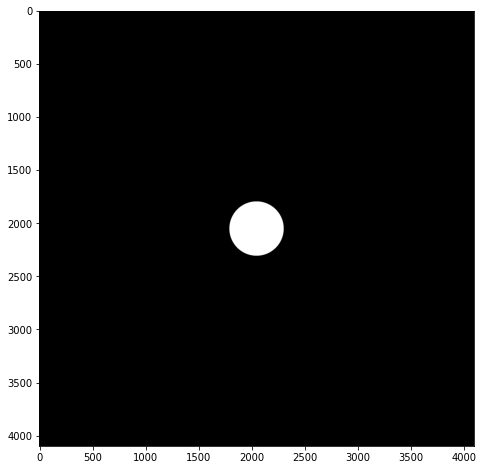

In [9]:
fig = plt.figure()
fig.set_size_inches(8, 8)
ax = fig.add_subplot(111)

ax.imshow(canvas, cmap="gray")
plt.show()

In [19]:
r.shape

(207,)

In [10]:
out = fft.fft2(1 - canvas)
intensity = np.absolute(out)
intensity = intensity / np.sqrt(np.sum(intensity ** 2))
intensity

array([[0.99384593, 0.01210981, 0.01141855, ..., 0.01032489, 0.01141855,
        0.01210981],
       [0.01210981, 0.0118764 , 0.01119405, ..., 0.01011468, 0.01119405,
        0.0118764 ],
       [0.01141855, 0.01119405, 0.01053793, ..., 0.0095006 , 0.01053793,
        0.01119405],
       ...,
       [0.01032489, 0.01011468, 0.0095006 , ..., 0.00853063, 0.0095006 ,
        0.01011468],
       [0.01141855, 0.01119405, 0.01053793, ..., 0.0095006 , 0.01053793,
        0.01119405],
       [0.01210981, 0.0118764 , 0.01119405, ..., 0.01011468, 0.01119405,
        0.0118764 ]])

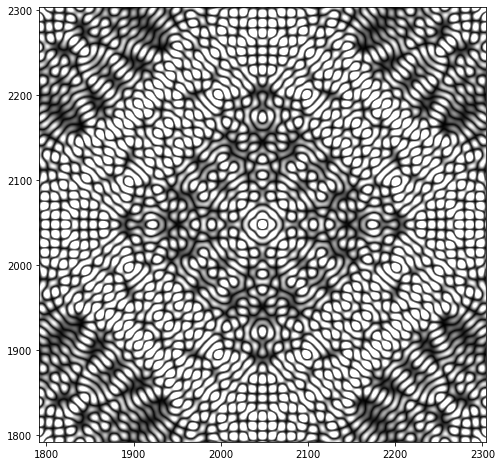

In [14]:
fig = plt.figure()
fig.set_size_inches(8, 8)
ax = fig.add_subplot(111)

ax.set_xlim(2048 - 256, 2048 + 256)
ax.set_ylim(2048 - 256, 2048 + 256)

ax.imshow(intensity, cmap="gray", interpolation="bilinear", aspect='auto', vmax=0.000001)
plt.show()

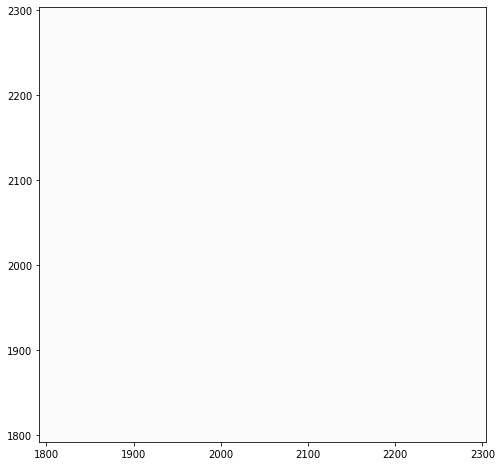

In [25]:
inv = fft.ifft2(intensity)
inv = np.absolute(inv)
inv = inv / np.sqrt(np.sum(inv ** 2))
inv = 1 - inv

fig = plt.figure()
fig.set_size_inches(8, 8)
ax = fig.add_subplot(111)

ax.set_xlim(2048 - 256, 2048 + 256)
ax.set_ylim(2048 - 256, 2048 + 256)

ax.imshow(inv, cmap="gray", interpolation="bilinear", aspect='auto')
plt.show()

In [21]:
pattern = np.zeros(intensity.shape)

canvas = np.zeros((4096, 4096))
for i in np.arange(4096):
    for j in np.arange(4096):
        pattern[i][j] = intensity[(i + 2048) % 4096][(j + 2048) % 4096]
pattern

array([[3.53844992e-06, 3.40331412e-06, 3.01189403e-06, ...,
        2.40452399e-06, 3.01189403e-06, 3.40331412e-06],
       [3.40331412e-06, 3.27150650e-06, 2.88981658e-06, ...,
        2.29783876e-06, 2.88981658e-06, 3.27150650e-06],
       [3.01189403e-06, 2.88981658e-06, 2.53657003e-06, ...,
        1.98957512e-06, 2.53657003e-06, 2.88981658e-06],
       ...,
       [2.40452399e-06, 2.29783876e-06, 1.98957512e-06, ...,
        1.51368191e-06, 1.98957512e-06, 2.29783876e-06],
       [3.01189403e-06, 2.88981658e-06, 2.53657003e-06, ...,
        1.98957512e-06, 2.53657003e-06, 2.88981658e-06],
       [3.40331412e-06, 3.27150650e-06, 2.88981658e-06, ...,
        2.29783876e-06, 2.88981658e-06, 3.27150650e-06]])

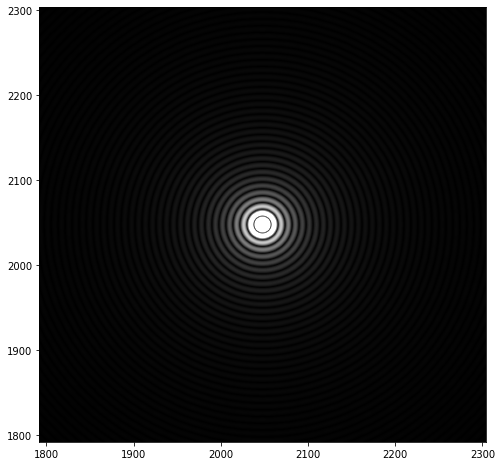

In [22]:
fig = plt.figure()
fig.set_size_inches(8, 8)
ax = fig.add_subplot(111)

ax.set_xlim(2048 - 256, 2048 + 256)
ax.set_ylim(2048 - 256, 2048 + 256)

ax.imshow(pattern, cmap="gray", interpolation="bilinear", aspect='auto', vmax=0.001)
plt.show()

In [23]:
"""
canvas = np.zeros((4096, 4096))
for i in np.arange(4096):
    for j in np.arange(4096):
        if 2048 - 256 <= i <= 2048 + 256:
            di = 2048 - i
            dj = 2048 - j
            d = di + np.abs(dj)
            if -256 <= d <= 256:
                canvas[i][j] = 1
        
        if 2048 - 192 <= i <= 2048 + 192:
            di = 2048 - i
            dj = 2048 - j
            d = di + np.abs(dj)
            if -192 <= d <= 192:
                canvas[i][j] = 0
                
canvas
"""

'\ncanvas = np.zeros((4096, 4096))\nfor i in np.arange(4096):\n    for j in np.arange(4096):\n        if 2048 - 256 <= i <= 2048 + 256:\n            di = 2048 - i\n            dj = 2048 - j\n            d = di + np.abs(dj)\n            if -256 <= d <= 256:\n                canvas[i][j] = 1\n        \n        if 2048 - 192 <= i <= 2048 + 192:\n            di = 2048 - i\n            dj = 2048 - j\n            d = di + np.abs(dj)\n            if -192 <= d <= 192:\n                canvas[i][j] = 0\n                \ncanvas\n'

In [24]:
canvas = np.zeros((4096, 4096))
for i in np.arange(4096):
    for j in np.arange(4096):
        if 2048 - 256 <= i <= 2048 + 256:
            if 2048 - 64 <= j <= 2048 + 64:
                canvas[i][j] = 1

        if 2048 - 256 <= j <= 2048 + 256:
            if 2048 - 64 <= i <= 2048 + 64:
                canvas[i][j] = 1

canvas

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

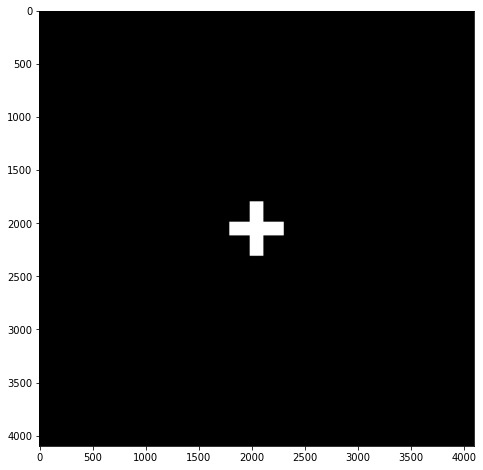

In [25]:
fig = plt.figure()
fig.set_size_inches(8, 8)
ax = fig.add_subplot(111)

ax.imshow(canvas, cmap="gray")
plt.show()

In [26]:
out = fft.fft2(1 - canvas)
intensity = np.absolute(out)
intensity = intensity / np.sqrt(np.sum(intensity ** 2))
intensity

array([[0.99654552, 0.00681477, 0.00650559, ..., 0.00602041, 0.00650559,
        0.00681477],
       [0.00681477, 0.00670892, 0.00640071, ..., 0.00591709, 0.00640071,
        0.00670892],
       [0.00650559, 0.00640071, 0.00609535, ..., 0.00561634, 0.00609535,
        0.00640071],
       ...,
       [0.00602041, 0.00591709, 0.00561634, ..., 0.00514473, 0.00561634,
        0.00591709],
       [0.00650559, 0.00640071, 0.00609535, ..., 0.00561634, 0.00609535,
        0.00640071],
       [0.00681477, 0.00670892, 0.00640071, ..., 0.00591709, 0.00640071,
        0.00670892]])

In [27]:
pattern = np.zeros(intensity.shape)

canvas = np.zeros((4096, 4096))
for i in np.arange(4096):
    for j in np.arange(4096):
        pattern[i][j] = intensity[(i + 2048) % 4096][(j + 2048) % 4096]
pattern

array([[5.98112618e-08, 5.52408451e-08, 4.22280722e-08, ...,
        2.27616307e-08, 4.22280722e-08, 5.52408451e-08],
       [5.52408451e-08, 5.07137007e-08, 3.78271243e-08, ...,
        1.85594663e-08, 3.78271243e-08, 5.07137007e-08],
       [4.22280722e-08, 3.78271243e-08, 2.53083429e-08, ...,
        6.61926085e-09, 2.53083429e-08, 3.78271243e-08],
       ...,
       [2.27616307e-08, 1.85594663e-08, 6.61926085e-09, ...,
        1.11621825e-08, 6.61926085e-09, 1.85594663e-08],
       [4.22280722e-08, 3.78271243e-08, 2.53083429e-08, ...,
        6.61926085e-09, 2.53083429e-08, 3.78271243e-08],
       [5.52408451e-08, 5.07137007e-08, 3.78271243e-08, ...,
        1.85594663e-08, 3.78271243e-08, 5.07137007e-08]])

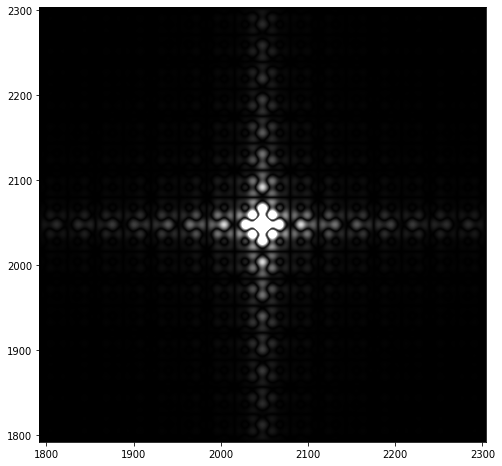

In [28]:
fig = plt.figure()
fig.set_size_inches(8, 8)
ax = fig.add_subplot(111)

ax.set_xlim(2048 - 256, 2048 + 256)
ax.set_ylim(2048 - 256, 2048 + 256)

ax.imshow(pattern, cmap="gray", interpolation="bilinear", aspect='auto', vmax=0.001)
plt.show()